## Observations and Insights 

# Analysis: 
* The largest sampled regimen in terms of total mice sampled was Capomulin. For this reason, subsequent analysis was carried out for this specific regimen only (The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. Best possible choice in terms of "Valididty"). Bar chart highlights the sample size of mice for each regimen administered, although it suggests Ramicane would produce a second alternative. 
* Box plot shows that Capomulin and Ramicane reduces the size of tumors better.
The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
* The line chart signifies a positive correlation between the Time and Tumor Volume size, hence confirming this relationship and the success of the test conducted. This provides validity for the subsequent scatter plot and regression analysis.
* Regression analysis of the scatter plot allows us to investigate the distribution of Tumor volume to the weight of the mice (g). 
The correlation coefficient between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.  The r-value of regression , r = 0.71 however shows that the data marginally signifies its validity of the trend to only account for 71% of the observed mice in the Dataset.  

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
plt.style.use('default')

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
cancer_data_merged = pd.merge(mouse_metadata, study_results, how='outer', on=["Mouse ID"]) #on=["Mouse_ID", "Mouse_ID"])



# Display the data table for preview
cancer_data_merged



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
number_of_mice = len(cancer_data_merged["Mouse ID"].unique())
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = cancer_data_merged.loc[cancer_data_merged.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = cancer_data_merged.loc[cancer_data_merged["Mouse ID"] == "g989", :]
dup_mice_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dupliate_df = cancer_data_merged[cancer_data_merged['Mouse ID'].isin(dup_mice_ID)==False]
clean_dupliate_df.head(200)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0


In [8]:
# Checking the number of mice in the clean DataFrame.
cleanDf_mice = len(clean_dupliate_df["Mouse ID"].unique())
cleanDf_mice


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_dupliate_df["Tumor Volume (mm3)"].groupby(clean_dupliate_df["Drug Regimen"]).mean()
#means
median = clean_dupliate_df["Tumor Volume (mm3)"].groupby(clean_dupliate_df["Drug Regimen"]).median()
#median
variance = clean_dupliate_df["Tumor Volume (mm3)"].groupby(clean_dupliate_df["Drug Regimen"]).var()
#variance
std = clean_dupliate_df["Tumor Volume (mm3)"].groupby(clean_dupliate_df["Drug Regimen"]).std()
#std
sem = clean_dupliate_df["Tumor Volume (mm3)"].groupby(clean_dupliate_df["Drug Regimen"]).sem()

drug_regimen_summary_df = pd.DataFrame({
                        "Mean":means,
                        "median":median,
                        "variance":variance,
                        "std":std,
                        "sem":sem
                        })

drug_regimen_summary_df.round(2)

,Mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_easy =  clean_dupliate_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_easy.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [11]:
total_mice_per_regimen = clean_dupliate_df["Drug Regimen"].value_counts()
total_mice_per_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Total number of mice')

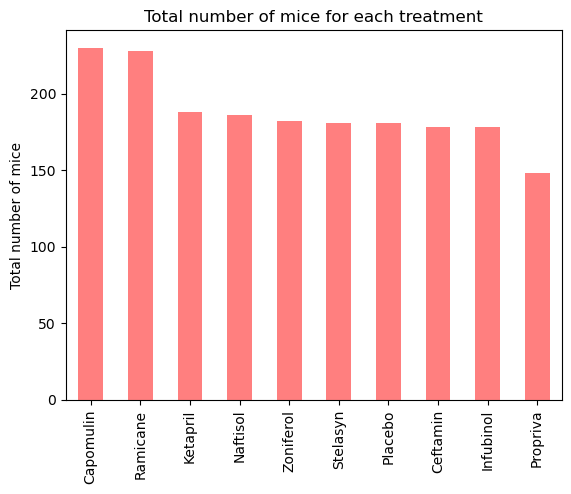

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_plot = total_mice_per_regimen.plot.bar(color='r', alpha=0.5, align="center")
plt.title("Total number of mice for each treatment")
plt.ylabel("Total number of mice")


Text(0.5, 0, 'Regimen')

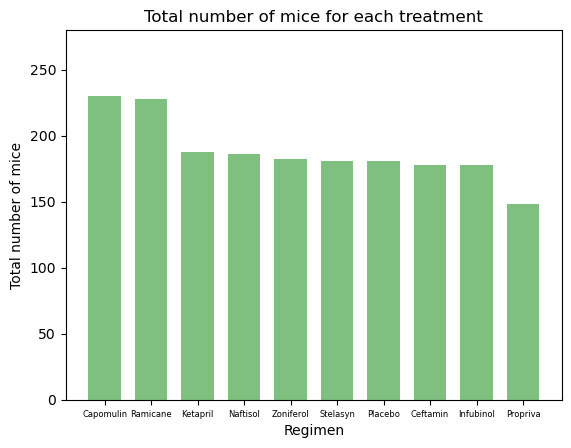

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = total_mice_per_regimen.index.values
y_axis = total_mice_per_regimen.values

bar_plot_chart = plt.bar(x_axis, y_axis, color='green', alpha=0.5, align="center",linewidth=0.1,width=0.7)



plt.xlim()
plt.ylim(0, max(y_axis)+50)
plt.xticks(fontsize=6)
plt.title("Total number of mice for each treatment")
plt.ylabel("Total number of mice")
plt.xlabel("Regimen")
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.




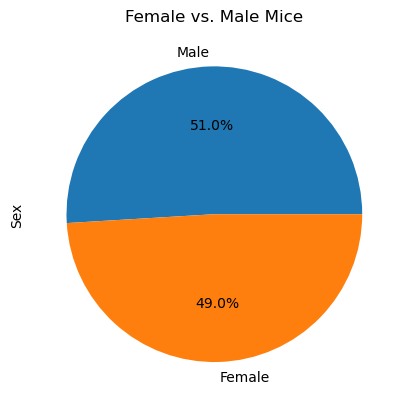

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = clean_dupliate_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
pie_plot = gender_counts.plot.pie(autopct='%1.1f%%')


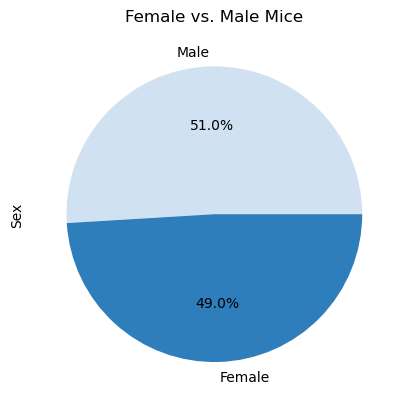

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(gender_counts)))
labels = ["Male","Female"]
plt.title("Female vs. Male Mice")
plt.ylabel('Sex')

pyplot_pie_chart = plt.pie(gender_counts, radius=1,autopct="%1.1f%%",colors=colors,labels = labels)



## Quartiles, Outliers and Boxplots

In [16]:
clean_dupliate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
Drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = cancer_data_merged[cancer_data_merged['Drug Regimen'].isin(Drug_list)]





In [18]:
# Start by getting the last (greatest) timepoint for each mouse
#capomulin
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in Drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [19]:
 # Put treatments into a list for for loop (and later for plot labels)   
    treatment = 0
    for drug in Drug_list:
        # Calculate the IQR and quantitatively determine if there are any potential 
        quartiles = last_timepoint[drug].quantile([0.25,0.5,0.75]).round(2)
        lowerq = quartiles[0.25].round(2)
        upperq = quartiles[quartiles]
        iqr = round(upperq-lowerq,2)
         # Determine outliers using upper and lower bounds
        lower_bound =  round(lowerq - (1.5*iqr),2)
        upper_bound = round(upperq + (1.5*iqr),2)
        



Text(0.5, 1.0, 'Tumor Volume by Drug Regimen')

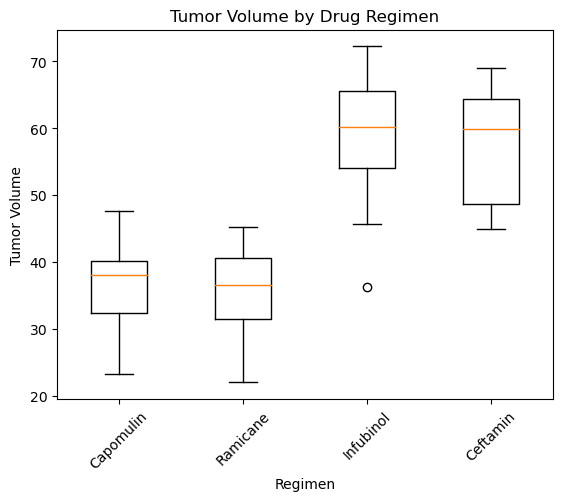

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# make data:
boxplot_regimen_list = []
for drug in Drug_list:
       boxplot_regimen_list.append(list(last_timepoint[drug].dropna()))      
# plot
fig = plt.figure()
plt.boxplot(boxplot_regimen_list)
# figure edditing
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], Drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")

## Line and Scatter Plots

In [21]:
clean_dupliate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#table showing only capomulin treatment
Capomulin_drugs = clean_dupliate_df.loc[clean_dupliate_df["Drug Regimen"] == "Capomulin",:]
Capomulin_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [23]:
#Specific to mouse i557
Capomulin_drugs_Mi557 = Capomulin_drugs.loc[Capomulin_drugs["Mouse ID"] == "i557",:]
Capomulin_drugs_Mi557

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


Text(0.5, 1.0, 'Capomulin treatment for mouse i557')

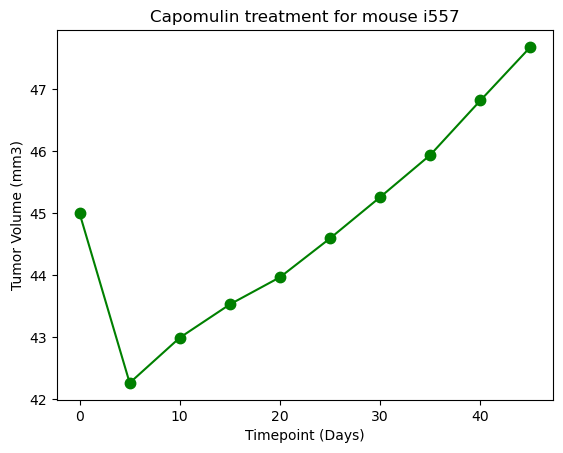

In [24]:
#Charting line plot
x_values = Capomulin_drugs_Mi557["Timepoint"]
y_values = Capomulin_drugs_Mi557["Tumor Volume (mm3)"]

plt.plot(x_values,y_values,markersize=15,marker=".",color="green")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment for mouse i557")


In [25]:
Capomulin_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#determining average weight for each mouse ID
average_weight_groups = Capomulin_drugs.groupby(["Mouse ID"]).mean()
average_weight_groups


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Text(0, 0.5, 'Tumor volume (mm3)')

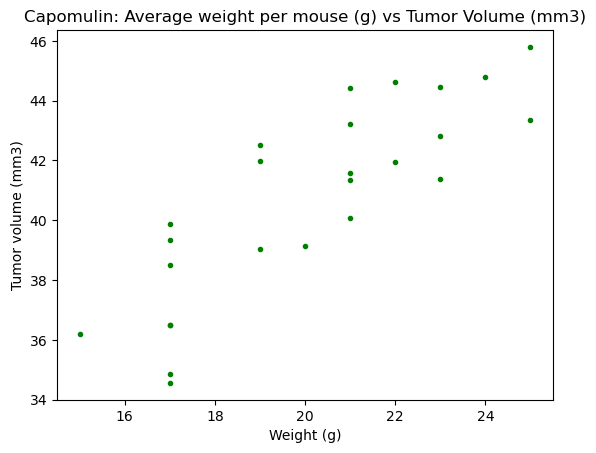

In [27]:
#Scatter plot
plt.scatter(average_weight_groups['Weight (g)'],average_weight_groups['Tumor Volume (mm3)'], color = "green", marker= ".")
plt.title("Capomulin: Average weight per mouse (g) vs Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)")


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [29]:
#P-value correlation coefficint
Correlation_capomulin_WEIGHTvsVOLUME = st.pearsonr(average_weight_groups["Weight (g)"],average_weight_groups["Tumor Volume (mm3)"])
Correlation_capomulin_WEIGHTvsVOLUME[0]
print(f"The correlation coefficient between mouse weight and the average tumor volume (mm) is {round(Correlation_capomulin_WEIGHTvsVOLUME[0],2)}")


The correlation coefficient between mouse weight and the average tumor volume (mm) is 0.84


The r-squared value is : 0.71


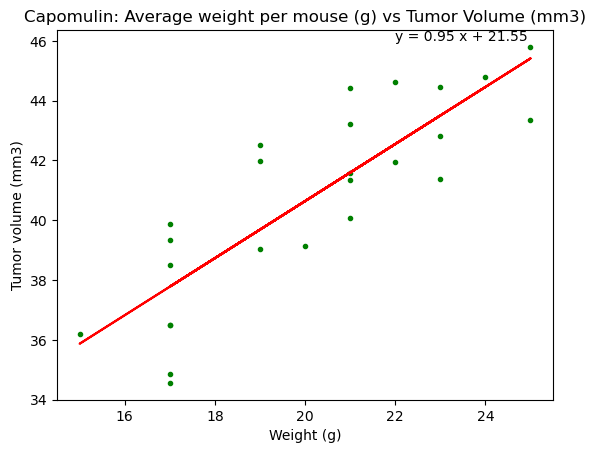

In [31]:
#Line of regression
(slope, intercept,rvalue, pvalue, stderr)= linregress(average_weight_groups["Weight (g)"],average_weight_groups["Tumor Volume (mm3)"])
regression_values = average_weight_groups["Weight (g)"]* slope + intercept
#line equation 
line_equation = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#scatter plot and line equation/regression
plt.scatter(average_weight_groups['Weight (g)'],average_weight_groups['Tumor Volume (mm3)'], color = "green", marker= ".")
plt.title("Capomulin: Average weight per mouse (g) vs Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.plot(average_weight_groups["Weight (g)"], regression_values,color = "red")
plt.annotate(line_equation,(22,46),fontsize = 10)

print(f'The r-squared value is : {round(rvalue**2,2)}')
